### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод
1) Данные в файле разделены символом '\\' нужно привести их в более читабельный вид, приводим в читабельный вид при помощи аргумента - sep = '\t'  
2) Смотрим общую информацию по таблицу, очень много пропущенных значений в столбцах: ceiling_height, floors_total, living_area, is_apartment,  kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest,  days_exposition


### Шаг 2. Предобработка данных

In [2]:

data['balcony'] = data['balcony'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean())
data['balcony'] = data['balcony'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'] = data['floors_total'].astype(int)

data.info()
print(data.head(2))
#print(data['days_exposition'].max())
#print(data['days_exposition'].min())
#print(data['days_exposition'].mean())
#print(data['days_exposition'].median())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        23613 non-null int64
cityCenters_nearest     23613 non-null int64
parks_around3000        23613 non-null int64
parks_nearest           23613 non-null int64
ponds_around3000        236

### Вывод 
1) Смотрим общую информацию по таблицу, очень много пропущенных значений в столбцах: ceiling_height, floors_total, living_area, is_apartment,  kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,  days_exposition  
Пройдем по каждому столбцу и определим чем можно заполнить пропуски:   
ceiling_height - думаю пропуск не так важен, можно его оставить.  
floors_total - пропущено меньше 1 процента значений, не так страшно, тем более восстановить этажность домов из среднего и медианы будет не правильно.   
living_area - оставим пустым  
is_apartment - оставим пустым  
kitchen_area - оставим пустым  
balcony - пустые значения можно заменить на 0, если не указали, значит балкона нет  
locality_name - пропущено меньше 1 процента значений, не так страшно   
airports_nearest - пустые значения можно заменить на 0, если не указали, значит аэропорта поблизости нет  
cityCenters_nearest - пустые значения можно заменить на 0, если не указали, значит до центра далековато)  
parks_around3000 - пропущенные значения заменим на 0, если не указали, значит парков поблизости нет  
parks_nearest - пропущенные значения заменим на 0, если не указали, значит парков поблизости нет  
ponds_around3000 - пропущенные значения заменим на 0, если не указали, значит водоемов поблизости нет  
ponds_nearest - пропущенные значения заменим на 0, если не указали, значит водоемов поблизости нет 

Причины пропуска данных:   
по столбцам living_area, kitchen_area - продавцы не знают точных данных по этим параметрам и решили не обманыть покупателей (это в идаельном мире конечно же), а если серьезно думаю у продавцов свободная планировка в квартире и точно назвать площадь кухни и жилую нельзя.   
по ceiling_height - просто не знают выосту потолков, в большинстве случаев она стандартная от 2.5 до 3 метров   
по is_apartment - есть гипотеза, что продавец специально не указал апартаменты это или нет, чтобы уже после просмотра покупателем квартиры ему об этом сообщить  
по locality_name - может быть эти дома новостройки и у них нет еще адреса.   
по аэропорту, паркам и водоемам - просто по близости их нет, из-за этого и не стали заполнять эти данные  
по days_exposition - может эти объявления еще продаются  


2) Преобразуем тип данных в столбцах: balcony, parks_around3000, airports_nearest, cityCenters_nearest, parks_nearest, ponds_around3000, ponds_nearest, days_exposition в тип данных int64 - берем функцию astype   

3) Столбец "days_exposition" - минимальное значение столбца = 1, максимальное = 1580, медиана - 95, среднее - 180. Заменить пропуски можно средним, так как считаю в большинстве случаев квартира будет продана за 6 месяца.   

4) Так как пропусков в столбце "floors_total" очень мало и заменить средним и медианой не получится, решил удалить строки с пропущенными значениями, чтобы они потом не помешали добавлению в таблицу нового столбца

### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
data['price_m'] = round(data['last_price'] / data['total_area']) #стоимость за 1 квадртный метр
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #перевод в формат datetime для последующего определения дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday #определение дня недели
data['month'] = data['first_day_exposition'].dt.month #определение месяца
data['year'] = data['first_day_exposition'].dt.year #определение года
data['%_living'] = round(data['living_area'] / data['total_area'] * 100) #процентный показатель жилой площади к общей площади квартиры
data['%_kitchen'] = round(data['kitchen_area'] / data['total_area'] * 100) #процентный показатель кухни к общей площади квартиры

def floors_name(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другое'
data['floors_name'] = data.apply(floors_name, axis = 1)


print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1             NaN            11         18.6      1         False  ...   
2             NaN             5         34.3      4         False  ...   
3             NaN            14          NaN      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition   price_m weekday  month  \
0                 2            755              

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [4]:
import matplotlib.pyplot as plt

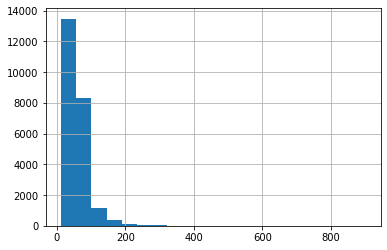

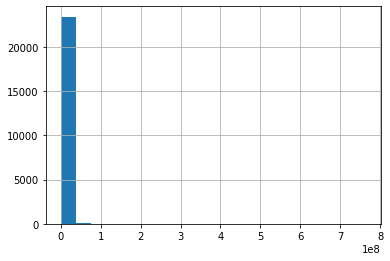

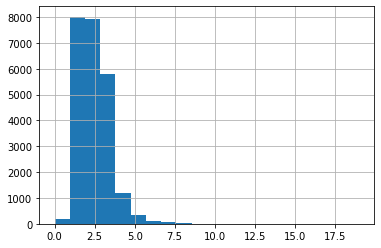

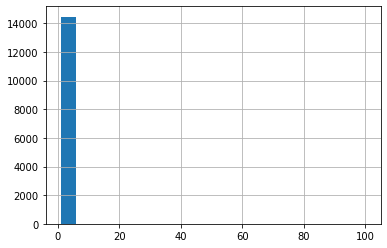

0.6535810085611219
0.36312416659845514
-0.05057425406545301
0.08559423828772042
-0.014504008214701209
                   total_images  last_price  total_area  first_day_exposition  \
locality_name                                                                   
Санкт-Петербург           15651       15651       15651                 15651   
посёлок Мурино              520         520         520                   520   
посёлок Шушары              439         439         439                   439   
Всеволожск                  398         398         398                   398   
Пушкин                      369         369         369                   369   
Колпино                     338         338         338                   338   
посёлок Парголово           327         327         327                   327   
Гатчина                     307         307         307                   307   
деревня Кудрово             299         299         299                   299   
Выборг 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


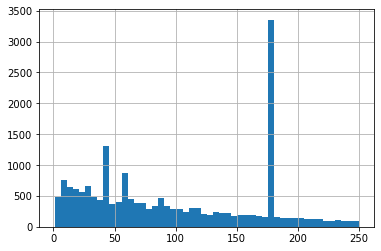

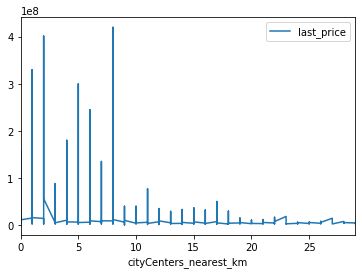

In [5]:
#По гистограммам:   
#По площади - всех больше получается квартир с площадью от 30 до 45 квадратов (их в районе 10к - http://joxi.ru/V2VZONKUk8dKR2)  
#По стоимости - для начала вывел общую информацию по данному параметру - http://joxi.ru/J2b8qRlTVgX8Pr, заметил что процентиль 75% до 7 млн, решил взять границы до 7 млн, так как если брать границе больше график становится очень мелким. Получается основная масса квартир это от 3 до 5 млн - http://joxi.ru/nAy4K08iwa58Z2   
#По кол-ву комнат - основная масса квартир одно и двухкомнатные - http://joxi.ru/Y2LJ530iEM7O9r  
#По высоте потолка - больше квартир с высотой потолка 2.5 метра - http://joxi.ru/YmExMWDTMBweYr  (чуть больше 5к) 

data_1 = data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
for column in data_1:
    data_1[column].hist(bins = 20)
    plt.show()

#-------

#По кол-ву дней на продаже: 
#Для построения гистограммы, для начала получил общие сведения - http://joxi.ru/Rmz4Z0kiMjY79A (решил взять границы от 0 до 250, так как 199 дней покрывает 75%.   
#Есть какие то пиковые продажи квартир за 170-180 дней, таких около 3,3к - http://joxi.ru/Q2KNQR7TvyLaam  
#Но есть так же пик и с 40 дней - http://joxi.ru/p27QPn7UNnKpXr (около 1,3к) 

data['days_exposition'].hist(bins = 50, range = (1,250)) #гистаграмма по кол-ву дней продаж квартир. 
data['days_exposition'].describe() #получается среднее = 180 дней, медиана = 124 дням

#-------

#Изучение факторов, которые влияют на продажу квартир:  
#Площадь квартиры - немного влияет на стоимость квартиры, но не всегда кф корреляции - 0.65  
#Кол-во комнта - можно сказать вообще не влияет на стоимость квартиры, кф корреляции - 0.36  
#По отдоленности от центра - данный фактор вообще не влияет на стоимость квартиры, кф корреляции - (-0.05)  
#По этажу (первый и последний) - решил для начала соедиить в группу квартиры первого и последнего этажа. Получается корреляции совсем нет, так как кф - 0.08. Получается, что цена квартиры последнего этажа не возрастает из-за этажа.  
#По этажу (другие) - аналогичная ситуация с предыдущим пунктом, коррелации совсем нет - показатель - (-0.01) 


print(data['last_price'].corr(data['total_area'])) # корреляция стоимости и площади
print(data['last_price'].corr(data['rooms'])) # корреляция стоимости и кол-ва комант
print(data['last_price'].corr(data['cityCenters_nearest'])) # корреляция стоимости и удаленности от центра
data_n_v = data.query('floors_name == "первый" or floors_name == "последний"')
print(data_n_v['last_price'].corr(data_n_v['floor'])) # корреляция стоимости и этажности расположения квартиры (первый и последний)
data_e = data.query('floors_name == "другое"')
print(data_e['last_price'].corr(data_e['floor'])) # корреляция стоимости и этажности расположения квартиры (другое)



#-------

#Топовые населенные пункты:
#Топовые населеные пункты по размещению объявлений - http://joxi.ru/Grq4pbgiGRxlaA  
#При группировании данных по Питеру, обнаружил что есть очень большое значение по стоимости квартире - это http://joxi.ru/a2XRXqQH4lg9nr 7,6 млн, решил его исключить при помощи query (наложил фильтр на стоимость)
#Аналогичные действия провел с каждым населенным пунктом, самые большие значение убирал из расчетов.  
#Самые дешевое жилье можно найти в Выборге - стоимость 1 кв метра 57к. - http://joxi.ru/p27QPn7UNn8zlr  
#Самое дорого жилье в Санкт-Петербурге - стоимость 1 кв метра почти 108к. - http://joxi.ru/p27QPn7UNn8zlr

print(data.groupby('locality_name').count().sort_values('total_area', ascending = False).head(10)) # топовые населеные пункты по размещению объявлений
pit_data = data.query('locality_name == "Санкт-Петербург" and last_price < 20000000')  
pit_data_m = round(pit_data['last_price'].sum() / pit_data['total_area'].sum())
print('Стоимость кв метра жилья в Санкт-Петербурге - ', pit_data_m)
mur_data = data.query('locality_name == "посёлок Мурино"')  
mur_data_m = round(mur_data['last_price'].sum() / mur_data['total_area'].sum())
print('Стоимость кв метра жилья в Мурино - ', mur_data_m)
shu_data = data.query('locality_name == "посёлок Шушары" and last_price < 10000000')  
shu_data_m = round(shu_data['last_price'].sum() / shu_data['total_area'].sum())
print('Стоимость кв метра жилья в Шушары - ', shu_data_m)
vs_data = data.query('locality_name == "Всеволожск" and last_price < 10000000')  
vs_data_m = round(vs_data['last_price'].sum() / vs_data['total_area'].sum())
print('Стоимость кв метра жилья в Всеволожске - ', vs_data_m)
pu_data = data.query('locality_name == "Пушкин" and last_price < 10000000')  
pu_data_m = round(pu_data['last_price'].sum() / pu_data['total_area'].sum())
print('Стоимость кв метра жилья в Пушкино - ', pu_data_m)
ko_data = data.query('locality_name == "Колпино" and last_price < 10000000')  
ko_data_m = round(ko_data['last_price'].sum() / ko_data['total_area'].sum())
print('Стоимость кв метра жилья в Колпино - ', ko_data_m)
pa_data = data.query('locality_name == "посёлок Парголово"')  
pa_data_m = round(pa_data['last_price'].sum() / pa_data['total_area'].sum())
print('Стоимость кв метра жилья в Парголово - ', pa_data_m)
ga_data = data.query('locality_name == "Гатчина" and last_price < 10000000')  
ga_data_m = round(ga_data['last_price'].sum() / ga_data['total_area'].sum())
print('Стоимость кв метра жилья в Гатчина - ', ga_data_m)
ku_data = data.query('locality_name == "деревня Кудрово" and last_price < 10000000')  
ku_data_m = round(ku_data['last_price'].sum() / ku_data['total_area'].sum())
print('Стоимость кв метра жилья в Кудрово - ', ku_data_m)
v_data = data.query('locality_name == "Выборг" and last_price < 10000000')  
v_data_m = round(v_data['last_price'].sum() / v_data['total_area'].sum())
print('Стоимость кв метра жилья в Выборге - ', v_data_m)

#-------

#Стоимость квартир в Питере взависимости от удаленности от центра:   
#Всего объявлений в Питере - 15615 - http://joxi.ru/82Q6Kk5U9Vp5aA   
#Есть цены квартирам за 7 млрд, нужно исключить это пиковое значение.  
#Виден явный спад по цене квартир на границе с 8 км - http://joxi.ru/gmv4W0gi1dn6RA   
#Получается центральная зона - это круг с радиусом 8 км от центра!   
#След зона начинается с 19 км - http://joxi.ru/Q2KNQR7TvyqVjm  

pit_data = data.query('locality_name == "Санкт-Петербург" and last_price < 700000000')
pit_data['cityCenters_nearest_km'] = (round(pit_data['cityCenters_nearest'] / 1000)).astype(int)
pit_data_price_km = round(pit_data['last_price'].sum() / pit_data['cityCenters_nearest_km'].sum())
print('Средняя стоимость 1 км от центра', pit_data_price_km)
pit_data.sort_values('cityCenters_nearest_km').plot(x = 'cityCenters_nearest_km', y = 'last_price')

#-------

#Стоимость квартир в центрольной зоне Питера:  
#Границы премиум жилья возьму из предыдущего пункта - http://joxi.ru/gmv4W0gi1dn6RA Ограничу радиус до 8 км.   
#Также как и во всех объявлениях из базы, нет сильной корреляции в стоимости и кол-ва комнат / стоимости и отдаленности от центра - http://joxi.ru/n2Y3xQ5Fe7OxWr

pit_data_pr = pit_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 9')
print(pit_data_pr['last_price'].corr(pit_data_pr['rooms'])) # корреляция стоимости и кол-ва комант
print(pit_data_pr['last_price'].corr(pit_data_pr['cityCenters_nearest'])) # корреляция стоимости и удаленности от центра






### Шаг 4. Выводы (добавил сам этот пункт)
По гистограммам:   
По площади - всех больше получается квартир с площадью от 30 до 45 квадратов (их в районе 10к - http://joxi.ru/V2VZONKUk8dKR2)  
По стоимости - для начала вывел общую информацию по данному параметру - http://joxi.ru/J2b8qRlTVgX8Pr, заметил что процентиль 75% до 7 млн, решил взять границы до 7 млн, так как если брать границе больше график становится очень мелким. Получается основная масса квартир это от 3 до 5 млн - http://joxi.ru/nAy4K08iwa58Z2   
По кол-ву комнат - основная масса квартир одно и двухкомнатные - http://joxi.ru/Y2LJ530iEM7O9r  
По высоте потолка - больше квартир с высотой потолка 2.5 метра - http://joxi.ru/YmExMWDTMBweYr  (чуть больше 5к) 


data_1 = data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
for column in data_1:
    data_1[column].hist(bins = 20)
    plt.show()


---

По кол-ву дней на продаже: 
Для построения гистограммы, для начала получил общие сведения - http://joxi.ru/Rmz4Z0kiMjY79A (решил взять границы от 0 до 250, так как 199 дней покрывает 75%.   
Есть какие то пиковые продажи квартир за 170-180 дней, таких около 3,3к - http://joxi.ru/Q2KNQR7TvyLaam  
Но есть так же пик и с 40 дней - http://joxi.ru/p27QPn7UNnKpXr (около 1,3к) 

data['days_exposition'].hist(bins = 50, range = (1,250)) #гистаграмма по кол-ву дней продаж квартир. 
data['days_exposition'].describe() #получается среднее = 180 дней, медиана = 124 дням

---

Изучение факторов, которые влияют на продажу квартир:  
Площадь квартиры - немного влияет на стоимость квартиры, но не всегда кф корреляции - 0.65  
Ко-во комнта - можно сказать вообще не влияет на стоимость квартиры, кф корреляции - 0.36  
По отдоленности от центра - данный фактор вообще не влияет на стоимость квартиры, кф корреляции - (-0.05)  
По этажу (первый и последний) - решил для начала соедиить в группу квартиры первого и последнего этажа. Получается корреляции совсем нет, так как кф - 0.08. Получается, что цена квартиры последнего этажа не возрастает из-за этажа.  
По этажу (другие) - аналогичная ситуация с предыдущим пунктом, коррелации совсем нет - показатель - (-0.01)  

print(data['last_price'].corr(data['total_area'])) # корреляция стоимости и площади
print(data['last_price'].corr(data['rooms'])) # корреляция стоимости и кол-ва комант
print(data['last_price'].corr(data['cityCenters_nearest'])) # корреляция стоимости и удаленности от центра
data_n_v = data.query('floors_name == "первый" or floors_name == "последний"')
print(data_n_v['last_price'].corr(data_n_v['floor'])) # корреляция стоимости и этажности расположения квартиры (первый и последний)
data_e = data.query('floors_name == "другое"')
print(data_e['last_price'].corr(data_e['floor'])) # корреляция стоимости и этажности расположения квартиры (другое)


---

Топовые населенные пункты:
Топовые населеные пункты по размещению объявлений - http://joxi.ru/Grq4pbgiGRxlaA  
При группировании данных по Питеру, обнаружил что есть очень большое значение по стоимости квартире - это http://joxi.ru/a2XRXqQH4lg9nr 7,6 млн, решил его исключить при помощи query (наложил фильтр на стоимость)
Аналогичные действия провел с каждым населенным пунктом, самые большие значение убирал из расчетов.  
Самые дешевое жилье можно найти в Выборге - стоимость 1 кв метра 57к. - http://joxi.ru/p27QPn7UNn8zlr  
Самое дорого жилье в Санкт-Петербурге - стоимость 1 кв метра почти 108к. - http://joxi.ru/p27QPn7UNn8zlr

print(data.groupby('locality_name').count().sort_values('total_area', ascending = False).head(10)) # топовые населеные пункты по размещению объявлений
pit_data = data.query('locality_name == "Санкт-Петербург" and last_price < 20000000')  
pit_data_m = round(pit_data['last_price'].sum() / pit_data['total_area'].sum())
print('Стоимость кв метра жилья в Санкт-Петербурге - ', pit_data_m)
mur_data = data.query('locality_name == "посёлок Мурино"')  
mur_data_m = round(mur_data['last_price'].sum() / mur_data['total_area'].sum())
print('Стоимость кв метра жилья в Мурино - ', mur_data_m)
shu_data = data.query('locality_name == "посёлок Шушары" and last_price < 10000000')  
shu_data_m = round(shu_data['last_price'].sum() / shu_data['total_area'].sum())
print('Стоимость кв метра жилья в Шушары - ', shu_data_m)
vs_data = data.query('locality_name == "Всеволожск" and last_price < 10000000')  
vs_data_m = round(vs_data['last_price'].sum() / vs_data['total_area'].sum())
print('Стоимость кв метра жилья в Всеволожске - ', vs_data_m)
pu_data = data.query('locality_name == "Пушкин" and last_price < 10000000')  
pu_data_m = round(pu_data['last_price'].sum() / pu_data['total_area'].sum())
print('Стоимость кв метра жилья в Пушкино - ', pu_data_m)
ko_data = data.query('locality_name == "Колпино" and last_price < 10000000')  
ko_data_m = round(ko_data['last_price'].sum() / ko_data['total_area'].sum())
print('Стоимость кв метра жилья в Колпино - ', ko_data_m)
pa_data = data.query('locality_name == "посёлок Парголово"')  
pa_data_m = round(pa_data['last_price'].sum() / pa_data['total_area'].sum())
print('Стоимость кв метра жилья в Парголово - ', pa_data_m)
ga_data = data.query('locality_name == "Гатчина" and last_price < 10000000')  
ga_data_m = round(ga_data['last_price'].sum() / ga_data['total_area'].sum())
print('Стоимость кв метра жилья в Гатчина - ', ga_data_m)
ku_data = data.query('locality_name == "деревня Кудрово" and last_price < 10000000')  
ku_data_m = round(ku_data['last_price'].sum() / ku_data['total_area'].sum())
print('Стоимость кв метра жилья в Кудрово - ', ku_data_m)
v_data = data.query('locality_name == "Выборг" and last_price < 10000000')  
v_data_m = round(v_data['last_price'].sum() / v_data['total_area'].sum())
print('Стоимость кв метра жилья в Выборге - ', v_data_m)

---

Стоимость квартир в Питере взависимости от удаленности от центра:   
Всего объявлений в Питере - 15615 - http://joxi.ru/82Q6Kk5U9Vp5aA Есть цены квартирам за 7 млрд, нужно исключить это пиковое значение.  
Виден явный спад по цене квартир на границе с 8 км - http://joxi.ru/gmv4W0gi1dn6RA Получается центральная зона - это круг с радиусом 8 км от центра!   
След зона начинается с 19 км - http://joxi.ru/Q2KNQR7TvyqVjm  

pit_data = data.query('locality_name == "Санкт-Петербург" and last_price < 700000000')
pit_data['cityCenters_nearest_km'] = (round(pit_data['cityCenters_nearest'] / 1000)).astype(int)
pit_data_price_km = round(pit_data['last_price'].sum() / pit_data['cityCenters_nearest_km'].sum())
print('Средняя стоимость 1 км от центра', pit_data_price_km)
pit_data.sort_values('cityCenters_nearest_km').plot(x = 'cityCenters_nearest_km', y = 'last_price')

---

Стоимость квартир в центрольной зоне Питера:  
Границы премиум жилья возьму из предыдущего пункта - http://joxi.ru/gmv4W0gi1dn6RA Ограничу радиус до 8 км.   
Также как и во всех объявлениях из базы, нет сильной корреляции в стоимости и кол-ва комнат / стоимости и отдаленности от центра - http://joxi.ru/n2Y3xQ5Fe7OxWr

pit_data_pr = pit_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 9')
print(pit_data_pr['last_price'].corr(pit_data_pr['rooms'])) # корреляция стоимости и кол-ва комант
print(pit_data_pr['last_price'].corr(pit_data_pr['cityCenters_nearest'])) # корреляция стоимости и удаленности от центра


### Шаг 5. Общий вывод
Очень сложное задание, очень много вводных и немного понимаешь что с чем сравнивать и тд) Надеюсь выводы сделал правильрые!)
P.S. прошу прощения что весь код закомментировал.   
Поехали:  

Самые продаваемые квартиры - одно и двухкомнатные с площадью в диапазоне от 30 до 45 квадратных метров. Стоимость таких квартир в диапазоне от 3 до 5 млн рублей. В среднем квартиры продаются за 6 месяцев, но конечно же бывают случае когда раньше.     
Самые дорогие квартиры за один квадратный метр находятся в Питере, самые дешевые в Выборге.   
Площадь квартиры конечно же влияет на итоговую стоимость квартиры.  
Самые дорогие квартиры находятся в радиусе 8 км от центра Питера. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод